# Estadística Aplicada
## Raúl Flores Robles 1838148
### Sesión 8 a 24 de feb 2023

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from lifelines import ExponentialFitter

In [6]:
dic1 = {'tiempo':[5,8,12,24,32,17,16,17,19,30],
        'recaida':[1,1,1,1,1,1,0,0,0,0]}

In [7]:
datos = pd.DataFrame(dic1)

In [8]:
datos

,tiempo,recaida
0,5,1
1,8,1
2,12,1
3,24,1
4,32,1
5,17,1
6,16,0
7,17,0
8,19,0
9,30,0


Suponer función de supervivencia exponencial

$f(t)=\lambda e^{-\lambda t}, h(t)= \lambda$

$\hat{\lambda} = \frac{\sum \delta_i}{\sum t_i}$

In [9]:
ex1 = ExponentialFitter().fit(datos['tiempo'],datos['recaida'])

In [10]:
ex1.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,30.0,12.247449,5.995442,54.004558,0.0,2.44949,0.014306,6.127248


In [11]:
ex1.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [12]:
nuestra_lambda = datos['recaida'].sum()/datos['tiempo'].sum()

In [13]:
nuestra_lambda

0.03333333333333333

In [14]:
ex1.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

1. Función de densidad de probabilidad
2. Función de supervivencia
3. Función de riesgo
4. Función acumulada

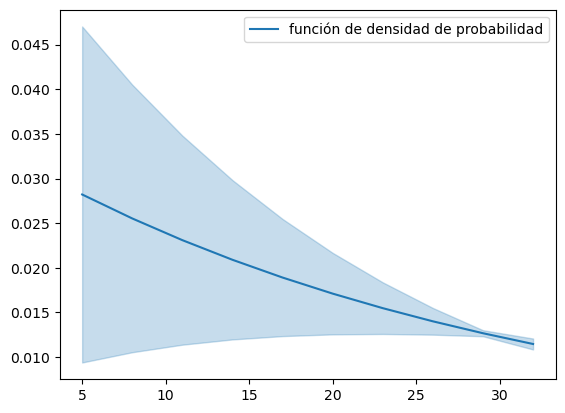

In [24]:
ex1.plot_density(label="función de densidad de probabilidad");

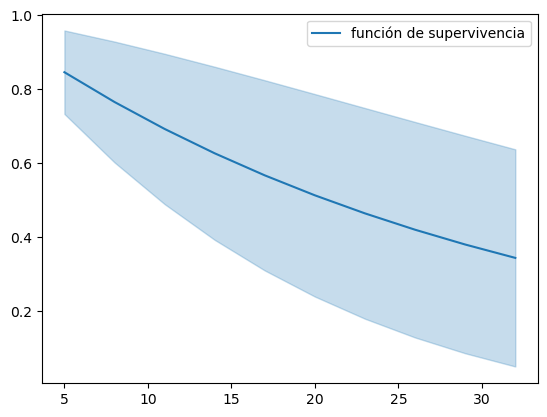

In [25]:
ex1.plot_survival_function(label="función de supervivencia");

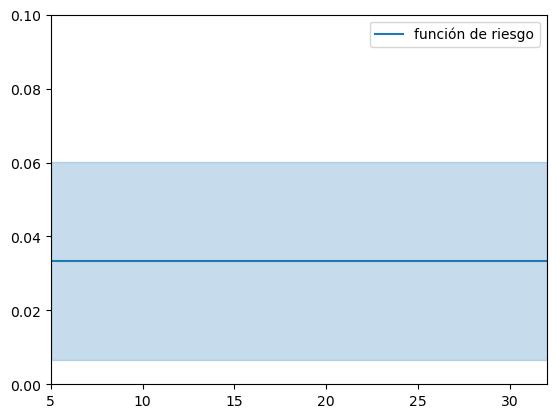

In [23]:
ex1.plot_hazard(label='función de riesgo');
plt.ylim(0,0.1);
plt.xlim(5,32);

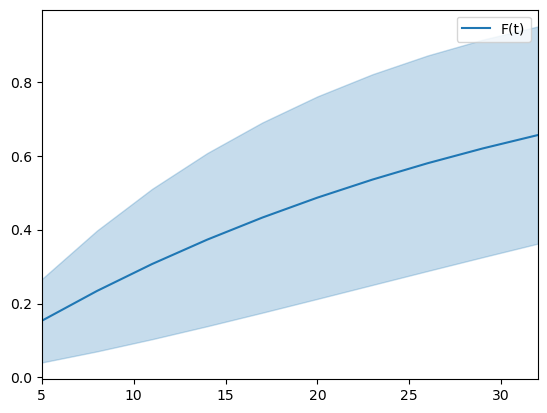

In [27]:
ex1.plot_cumulative_density(label='F(t)')
plt.xlim(5,32);

In [34]:
ex1.median_survival_time_

20.794415437592868

En el mes 20.8, el 50% de los pacientes ya ha tenido una recaída

In [29]:
from lifelines.datasets import load_rossi

In [32]:
rossi = load_rossi()

In [33]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


¿El tiempo de supervivencia (tiempo de volver a ser arrestado) es exponencial, weibull o lognormal?

In [35]:
ex2 = ExponentialFitter().fit(rossi['week'],rossi['arrest'])

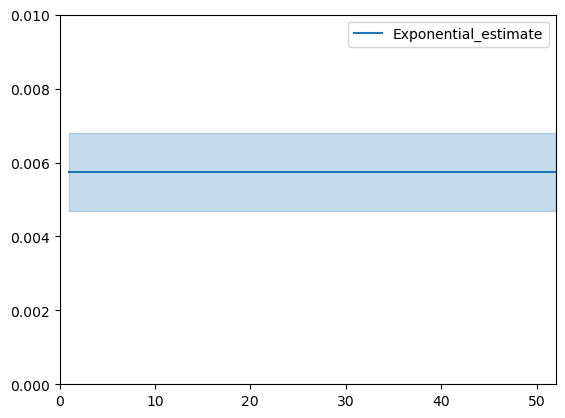

In [40]:
ex2.plot_hazard()
plt.ylim(0,0.01)
plt.xlim(0,52);

In [42]:
ex2.hazard_.head()

,Exponential_estimate
1.000000,0.005755
1.118329,0.005755
1.236659,0.005755
1.354988,0.005755
1.473318,0.005755


In [43]:
from lifelines import WeibullFitter

In [44]:
weib1 = WeibullFitter().fit(rossi['week'],rossi['arrest'])

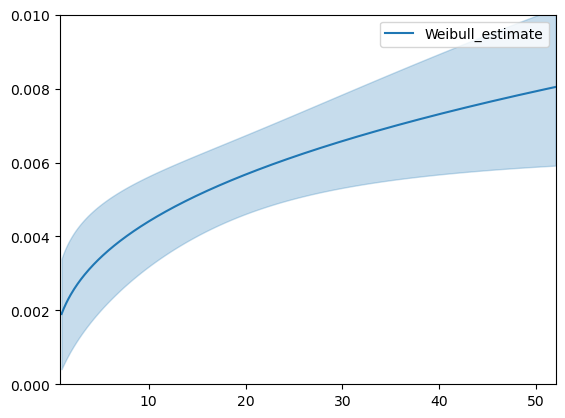

In [47]:
weib1.plot_hazard()
plt.ylim(0,0.01)
plt.xlim(0.8,52);

In [48]:
from lifelines import LogNormalFitter

In [49]:
logn1 = LogNormalFitter().fit(rossi['week'],rossi['arrest'])

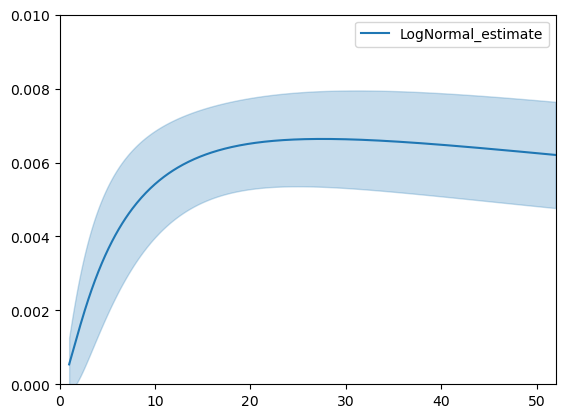

In [50]:
logn1.plot_hazard()
plt.ylim(0,0.01)
plt.xlim(0,52);

Para comparar modelos y elegir el "mejor", se suele utilizar el Criterio de Información de Akaike (AIC) cuya fórmula es $ AIC = -2LogL + 2k $ donde k es el número de parámetros a estimar.

El "mejor" modelo es el que tiene el menor valor de AIC.
El Crtiterio de Akaike "prefiere" modelos mas simples en lugar de complejos.

In [53]:
ex2.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 432 total observations, 318 right-censored observations>
   number of observations = 432
number of events observed = 114
           log-likelihood = -701.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 173.76      16.27           141.87           205.66

          cmp to     z      p   -log2(p)
lambda_     0.00 10.68 <0.005      85.99
---
AIC = 1405.95

In [55]:
ex2.AIC_.round(2),weib1.AIC_.round(2),logn1.AIC_.round(2)

(1405.95, 1397.25, 1399.82)

In [61]:
print(f'exponencial {ex2.AIC_.round(2)}, weibull {weib1.AIC_.round(2)}, lognormal {logn1.AIC_.round(2)}')

exponencial 1405.95, weibull 1397.25, lognormal 1399.82


De acuerdo con el Criterio de Akaike (AIC) el modelo que mejor estimar el tiempo de supervivencia de volver a ser arrestado es el modelo de Weibull. En este modelo el riesgo de volver a ser arrestado es creciente

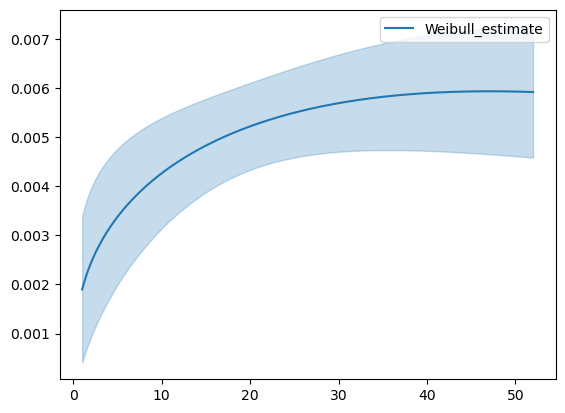

In [64]:
weib1.plot_density();

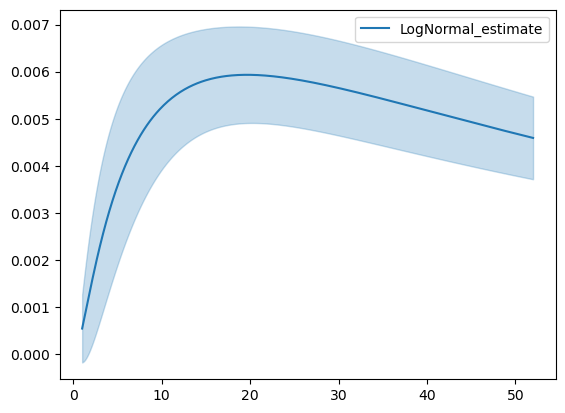

In [65]:
logn1.plot_density();